In this notebook we are studying the reviews textual description.
1) We will make a cloud of words to get a sens of what this huge dataset of 2'589'586 textual descriptions
2) We will perform a topic analysis with LDA model to understand what are the topics of those reviews

In [1]:
import pandas as pd
import pathlib

from models.lda_topics_analysis_model import LDAAnalysis
from src.data.text_reviews_dataloader import TextReviews
data_dir_path = pathlib.Path("../../data")

In [ ]:
reviews_path = data_dir_path / "generated" / "reviews_df.csv"
reviews_df = pd.read_csv(reviews_path)
reviews_df['text'] = reviews_df['text'].dropna()
reviews_df['text'] = reviews_df['text'].astype(str)
reviews_df = reviews_df[reviews_df['text'].str.strip() != '']  # remove empty strings

In [28]:
combined_text = ' '.join(reviews_df['text'])

In [30]:
len(combined_text)

1313349042

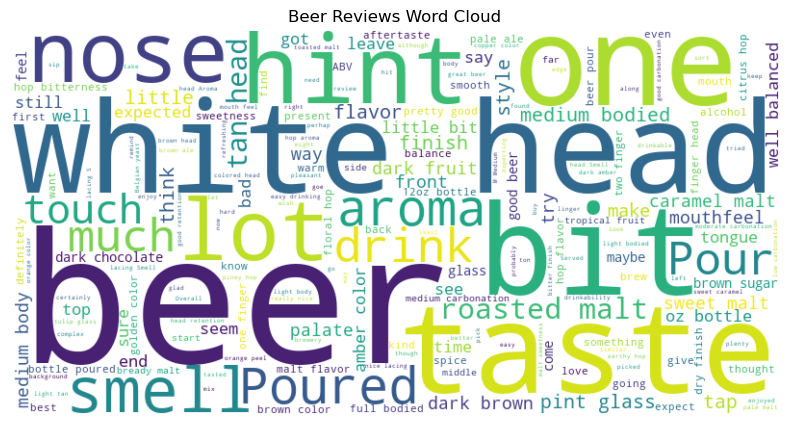

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Beer Reviews Word Cloud')
plt.show()

In [147]:
# save pickle of wordcloud :
import pickle
import pathlib

data_dir_path = pathlib.Path("../../data")
with open(data_dir_path / 'generated' / 'wordcloud.pkl', 'wb') as f:
    pickle.dump(wordcloud, f)

frequencies = wordcloud.words_

with open(data_dir_path / 'generated' / 'frequencies.pkl', 'wb') as f:
    pickle.dump(frequencies, f)

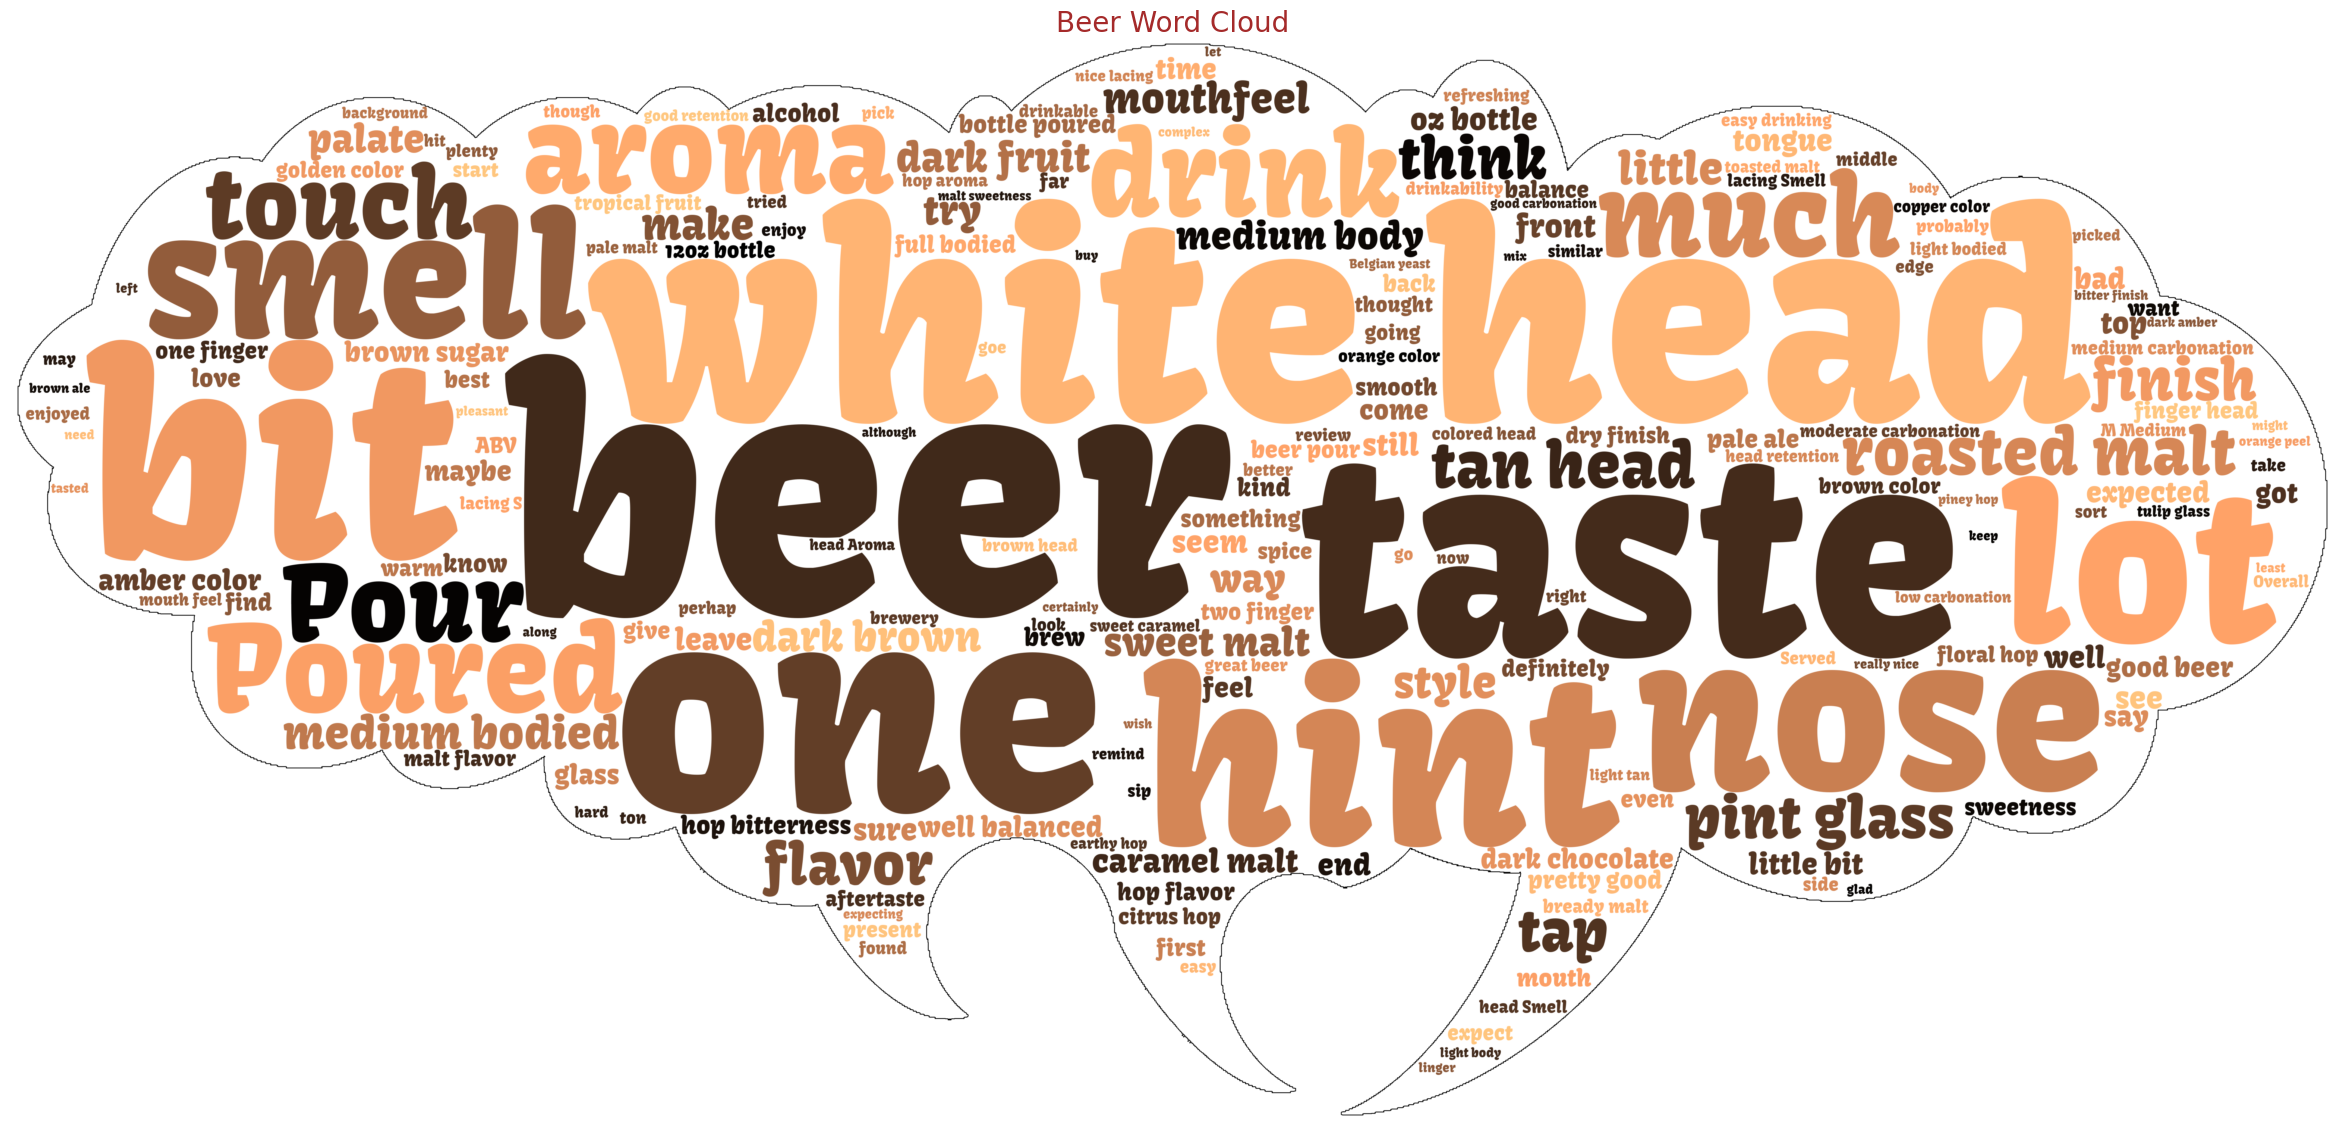

In [146]:
import pathlib
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

images_dir_path = pathlib.Path("../../images")
fonts_dir_path = pathlib.Path("../../fonts")
beer_mask = np.array(Image.open(images_dir_path / "bubble_mask.png"))

wordcloud: WordCloud = WordCloud(
    background_color="white",
    mask=beer_mask,
    contour_width=3,
    contour_color="black",
    font_path=fonts_dir_path / 'Kavoon' / 'Kavoon-Regular.ttf',
    prefer_horizontal=1,
    min_font_size=20,
    colormap="copper_r").generate_from_frequencies(frequencies)

plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Beer Word Cloud", fontsize=20, color="brown")
plt.show()

Now we are performing an LDA analysis to extract the topics that we have in the reviews, the word cloud is provising a lot of time people mention the word taste, smell, aroma,... which is related to the beer characteristics and not to other things :)

In [ ]:
reviews_df_path = data_dir_path / "generated" / "reviews_df.csv"
model_path = data_dir_path / "generated" / "biglda"

# load the already trained LDA model (see src/model/lda_topics_analysis_model.py)
model = LDAAnalysis()
model.load_dataset(reviews_df_path)
model.preprocess()
model.load_saved_model(model_path)
model.print_topics(num_words=10)

Loaded dataset with 2589586 reviews.
starting preprocess
preprocessing completed
[(0,
  '0.021*"hop" + 0.018*"light" + 0.018*"head" + 0.017*"nice" + 0.015*"malt" + '
  '0.014*"white" + 0.012*"good" + 0.011*"taste" + 0.011*"sweet" + '
  '0.011*"aroma"'),
 (1,
  '0.031*"dark" + 0.020*"brown" + 0.014*"head" + 0.013*"sweet" + 0.012*"malt" '
  '+ 0.011*"nice" + 0.011*"flavor" + 0.009*"chocolate" + 0.009*"roasted" + '
  '0.009*"bit"'),
 (2,
  '0.420*"-" + 0.040*"appearance" + 0.018*"\x96" + 0.012*"cork" + 0.010*"–" + '
  '0.008*"medium" + 0.007*"fantome" + 0.006*"lacing.s" + 0.006*"=" + '
  '0.004*"shared"'),
 (3,
  '0.017*"belgian" + 0.014*"sour" + 0.010*"fruit" + 0.010*"yeast" + '
  '0.009*"note" + 0.009*"tart" + 0.008*"flavor" + 0.007*"apple" + 0.007*"dry" '
  '+ 0.006*"quite"'),
 (4,
  '0.078*"bottle" + 0.042*"poured" + 0.019*"pint" + 0.018*"served" + '
  '0.013*"glass." + 0.012*"glass" + 0.011*"&amp;" + 0.010*"oz" + 0.009*"12" + '
  '0.008*"tap"'),
 (5,
  '0.032*"beer" + 0.019*"like" + 

We can summarize each topic as follows :\
Topic 0: Light, balanced beers and their aroma/taste notes.\
Topic 1: Dark, malt-forward beers (stouts, porters) and their roasted flavors.\
Topic 2: Appearance details, perhaps Belgian farmhouse bottles and shared tasting experiences (with some noise from formatting).\
Topic 3: Belgian/sour ales with tart, fruity yeast characteristics.\
Topic 4: Serving methods, packaging, and glassware descriptions.\
Topic 5: General beer impressions, overall taste/smell evaluations, and broad opinions.\
In essence, the LDA model seems to have identified a few style-related clusters (light vs. dark vs. Belgian/sour), one related to serving method/appearance, and a generic catch-all category.

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model.lda_model, model.corpus, model.dictionary, n_jobs=1)
pyLDAvis.display(vis)

As we can see the interpretation is that people mostly talk about the beer characteristics which is good news! We will be able to use the beer reviews as a proxy to understand the beer styles. Head over to the `beer_characteristics_transformer` notebook 